# 1.数据读取模块：
将指定文件夹（ROOT）中的CIFAR-10数据读取并保存成Numpy数组返回。

In [1]:
# -*- coding: utf-8 -*-
#依赖：python3.x ；numpy；Pillow
import pickle
import numpy as np
import os
from scipy.misc import imread


def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  print ("load data: "+filename)
  with open(filename, 'rb') as f:
    datadict = pickle.load(f,encoding='iso-8859-1')
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):                       #读取data_batch_1到data_batch_5的数据
    f = 'data_batch_%d' % (b)
    X, Y = load_CIFAR_batch(ROOT+"/"+f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(ROOT+"/"+'test_batch')  #读取test_batch的数据
  return Xtr, Ytr, Xte, Yte



# 2.数据分配：
1.将读取的numpy数据分为train:49000;validation:1000;test:1000

2.利用可视化工具读取其中一个图片

load data: ./cifar-10-batches-py/data_batch_1
load data: ./cifar-10-batches-py/data_batch_2
load data: ./cifar-10-batches-py/data_batch_3
load data: ./cifar-10-batches-py/data_batch_4
load data: ./cifar-10-batches-py/data_batch_5
load data: ./cifar-10-batches-py/test_batch
[[ 59.  43.  50. ... 158. 152. 148.]
 [ 16.   0.  18. ... 123. 119. 122.]
 [ 25.  16.  49. ... 118. 120. 109.]
 ...
 [208. 201. 198. ... 160.  56.  53.]
 [180. 173. 186. ... 184.  97.  83.]
 [177. 168. 179. ... 216. 151. 123.]]


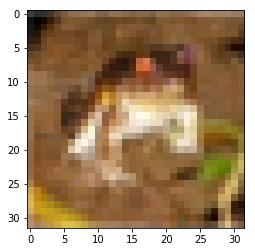

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image

num_training=49000
num_validation=1000
num_test=1000
"""
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    
cifar10_dir = './cifar-10-batches-py'

x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)
   
    # Subsample the data
mask = range(num_training, num_training + num_validation)
X_val = x_train[mask]
Y_val = y_train[mask]
mask = range(num_training)
X_train = x_train[mask]
Y_train = y_train[mask]
mask = range(num_test)
X_test = x_test[mask]
Y_test = y_test[mask]

#---------------------------------------------------------------------------------------------
print (np.array(X_train)[0][0])
#img0 = Image.fromarray(np.array(X_train.astype("int"))[0][0])
#img1 = Image.fromarray(np.array(X_train.astype("int"))[0][1])
#img2 = Image.fromarray(np.array(X_train.astype("int"))[0][2])
img0 = Image.fromarray(np.array(X_train)[0][0])
img1 = Image.fromarray(np.array(X_train)[0][1])
img2 = Image.fromarray(np.array(X_train)[0][2])


imgg = Image.merge("RGB",(img0.convert('L'),img1.convert('L'),img2.convert('L')))
plt.imshow(imgg)
imgg.save("./param/img_0.png")
#----------------------------------------------------------------------------------------------


# 3.数据去均值：
为了归一化，数据减去均值。

In [3]:
# Normalize the data: subtract the mean image
print ("减去均值之前，X_train的第一幅图像的RGB通道的第一个通道的图像数值32*32：")
print (X_train[:,:,0:3,0:3][0][0])
mean_image = np.mean(X_train, axis=0)    
#shape=(3,32, 32) 这里axis=0表示按照列算均值,在这里是将所有图像的R图上的每个像素点的数值取平均,G,B通道同理，这里是image mean。
X_train_m = X_train - mean_image
X_val_m = X_val - mean_image
X_test_m = X_test - mean_image


print ("-----------------------------------------------")
print ("mean_image的形状以及数值")
print (mean_image.shape)
print (mean_image[:,0:3,0:3][0])
print ("-----------------------------------------------")
print ("减去均值之后，X_train的第一幅图像的RGB通道的第一个通道的图像数值32*32：")
print (X_train_m[:,:,0:3,0:3][0][0])


减去均值之前，X_train的第一幅图像的RGB通道的第一个通道的图像数值32*32：
[[59. 43. 50.]
 [16.  0. 18.]
 [25. 16. 49.]]
-----------------------------------------------
mean_image的形状以及数值
(3, 32, 32)
[[130.64189796 130.05569388 130.96055102]
 [130.02414286 129.26055102 130.13655102]
 [129.66336735 128.65646939 129.41834694]]
-----------------------------------------------
减去均值之后，X_train的第一幅图像的RGB通道的第一个通道的图像数值32*32：
[[ -71.64189796  -87.05569388  -80.96055102]
 [-114.02414286 -129.26055102 -112.13655102]
 [-104.66336735 -112.65646939  -80.41834694]]


# 4.利用spyder 保存第一层卷积之后的数据
数据都保存在./param文件夹中

# 5.数据经过每层之后的map可视化图片

## 5.0 定义可视化map子函数


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

def plot_pic(data_pic,name_pic):
    
    #print (np.array(data_pic)[0][0])            #将第一帧图片的第一个通道的数字显示出来
#    img0 = Image.fromarray(np.array(data_pic.astype("int"))[0][0])
#    img1 = Image.fromarray(np.array(data_pic.astype("int"))[0][1])
#    img2 = Image.fromarray(np.array(data_pic.astype("int"))[0][2])
    img0 = Image.fromarray(np.array(data_pic)[0][0])
    img1 = Image.fromarray(np.array(data_pic)[0][1])
    img2 = Image.fromarray(np.array(data_pic)[0][2])

    imgg = Image.merge("RGB",(img0.convert('L'),img1.convert('L'),img2.convert('L')))
    plt.imshow(imgg)
    plt.title(name_pic)
    imgg.save("./param/"+"img_" + name_pic + ".png")
    print ("pic save :"+"./param/"+"img_" + name_pic + ".png" + " done!")
    

## 5.1 第一层：卷积之后的可视化

(10, 32, 30, 30)
pic save :./param/img_data_1_con1[10-32-30-30].png done!


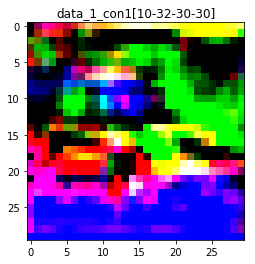

In [5]:
con1_data = np.load('./param/param_0.npy') 
print (con1_data.shape)
plot_pic(con1_data,"data_1_con1[10-32-30-30]")


## 5.2 第二层：池化之后的可视化

(10, 32, 14, 14)
pic save :./param/img_data_2_maxpool1[10-32-14-14].png done!


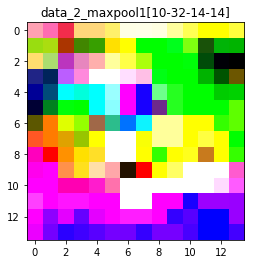

In [6]:
maxpooling1_data = np.load('./param/param_1.npy')
print (maxpooling1_data.shape)
plot_pic(maxpooling1_data,"data_2_maxpool1[10-32-14-14]")

## 5.3 第三层：Relu激活层之后的可视化

(10, 32, 14, 14)
pic save :./param/img_data_3_relu1.png done!


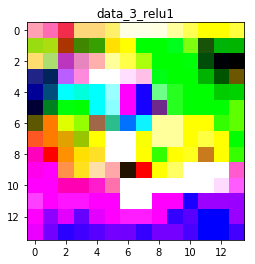

In [7]:
relu1_data = np.load('./param/param_2.npy')
print (relu1_data.shape)
plot_pic(relu1_data,"data_3_relu1")

## 5.4 第四层：卷积层之后的可视化

(10, 16, 14, 14)
pic save :./param/img_data_4_con2[10-16-14-14].npy.png done!


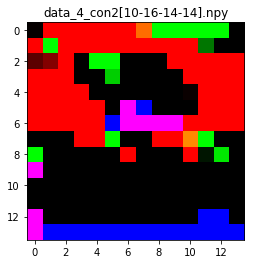

In [8]:
con2_data = np.load('./param/param_3.npy') 
print (con2_data.shape)
plot_pic(con2_data,"data_4_con2[10-16-14-14].npy")

## 5.4.2 卷积层逐行推导

In [9]:
relu1_data = np.load('./param/param_3.npy')
print ("卷积层的输入的shape是：\n"+str(relu1_data.shape))
pad = 1
in_data_pad = np.pad(relu1_data, ((0,), (0,), (pad,), (pad,)), mode='constant', constant_values=0) #边缘填充，这里上下左右各填一个像素
print ("\n卷积层的输入边缘填充之后的shape是：\n"+str(in_data_pad.shape))
print ("\n卷积层的输入边缘填充之后的第一个batch的第一个channel的前三行是：\n"+str(in_data_pad[:,:,0:3,0:3][0][0]))


卷积层的输入的shape是：
(10, 16, 14, 14)

卷积层的输入边缘填充之后的shape是：
(10, 16, 16, 16)

卷积层的输入边缘填充之后的第一个batch的第一个channel的前三行是：
[[   0.            0.            0.        ]
 [   0.            6.76592115  731.55082585]
 [   0.          553.99264483 -334.99157495]]


In [10]:
in_data_pad_masked = in_data_pad[:, :, 0:3, 0:3]
print ("卷积层输入数据的32个channel的map的3X3的小块：")
print (in_data_pad_masked.shape)
print ("\n卷积层输入数据的第一个batch的第一个channel的map的3X3的小块：")
print (in_data_pad_masked[0][0])

conv2_w = np.random.randn(32,16, 3, 3)    #w初值设置，随机产生标准正太分布范围内的数
print ("\n第一个输入数据对应第一个输出数据的卷积核，类似于全连接中的W11：")
print (conv2_w[0][0])
conv2_b = np.random.randn(16)
conv2_out = np.zeros((10 , 16 , 14, 14))
conv2_out[:, 0 , 0, 0] = np.sum(in_data_pad_masked * conv2_w[0, :, :, :], axis=(1,2,3))#+ conv2_b[0]
print ("\n卷积层输出数据的第一个batch的第一个channel的map的3X3的小块")
print (conv2_out[:,:,0:3,0:3][0][0])

卷积层输入数据的32个channel的map的3X3的小块：
(10, 16, 3, 3)

卷积层输入数据的第一个batch的第一个channel的map的3X3的小块：
[[   0.            0.            0.        ]
 [   0.            6.76592115  731.55082585]
 [   0.          553.99264483 -334.99157495]]

第一个输入数据对应第一个输出数据的卷积核，类似于全连接中的W11：
[[ 0.61683637 -0.10466443 -2.95916211]
 [ 2.93949204 -0.95737533 -0.79218148]
 [ 2.12657527  0.403753   -0.27793819]]

卷积层输出数据的第一个batch的第一个channel的map的3X3的小块
[[-48409.44277729      0.              0.        ]
 [     0.              0.              0.        ]
 [     0.              0.              0.        ]]


## 5.5 第五层：池化层之后的可视化

(10, 16, 6, 6)
pic save :./param/img_data_5_maxpooling2[10-16-6-6].png done!


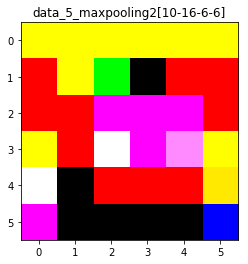

In [11]:
maxpooling2_data = np.load('./param/param_4.npy')
print (maxpooling2_data.shape)
plot_pic(maxpooling2_data,"data_5_maxpooling2[10-16-6-6]")

## 5.6 第六层：Relu激活层之后的可视化

(10, 16, 6, 6)
pic save :./param/img_data_6_relu2[10-16-6-6].png done!


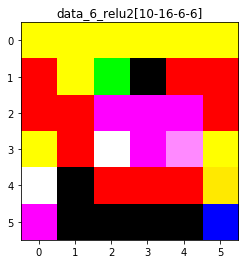

In [12]:
relu2_data = np.load('./param/param_5.npy')
print (relu2_data.shape)
plot_pic(relu2_data,"data_6_relu2[10-16-6-6]")

## 5.7 第七层： Flatten层的数据展示
注：由于展平之后每个batch只有一个向量而不是2维数组，所以从这层开始展示每个batch的向量数据

In [13]:
data_7_flatten1 = np.load("./param/param_6.npy")
print (data_7_flatten1.shape)
print (data_7_flatten1)


(10, 576)
[[  731.55082585  3276.01289382  3246.27159517 ... 14000.9681246
  18893.57886732 18001.57822016]
 [    0.             0.          1838.16182022 ...     0.
      0.          4518.22624836]
 [ 9482.09436336  9858.90852567 10494.58432415 ...  3685.40497636
   3685.40497636     0.        ]
 ...
 [11670.31581835 11772.22290088 12462.12552951 ... 14093.20489719
  14795.26389827 15858.98790975]
 [    0.             0.             0.         ...  8862.00514482
   9789.6244638   7426.07702441]
 [12487.16335835 12631.22482114 11822.08619814 ...  9071.95900537
   8867.71619526 11100.2334383 ]]


## 5.8 第八层：全连接层的数据展示

In [14]:
data_8_FC1 = np.load("./param/param_7.npy")
print (data_8_FC1.shape)
print (data_8_FC1)

(10, 100)
[[-1.10555872e+01 -3.20977389e+01 -4.33490583e+01 -3.32378626e+01
   2.52191599e+01 -1.98649446e+01 -8.64731211e+00  2.08316810e+01
  -1.91646315e+01  9.58654388e+01 -1.70681535e+01 -2.45363539e+01
  -2.55514962e+01 -2.07593143e+01 -1.26535856e+00  7.71297158e-01
   4.51148637e+01  4.14788952e+01 -3.06898009e+01 -1.19769491e+01
   5.52847243e+00  2.43806663e+01  2.17186156e+01 -1.95137596e+00
  -1.23195290e+01  9.09330423e-01  4.74398202e+01 -2.24435489e+01
  -1.31964100e+01  9.64730192e+00  5.44647530e+01 -1.25405198e+01
  -2.15284047e+00 -3.59082293e+01  3.57601229e+01  4.46929846e+01
   1.05349265e+01 -2.13916898e+01  9.37627150e+00  3.88873478e+01
  -2.41846424e+01 -2.24829363e+01  5.90841455e+01  4.83453403e+01
   1.16232463e+02 -1.73084258e+01  7.48783001e+01  7.99220261e+01
  -1.64818827e+01 -2.12292722e+01  2.50617839e+01  8.28518850e+00
   9.16088000e+00 -1.20917357e+01  7.61345713e+00  2.31997801e+01
  -1.64622861e+01 -1.36646541e+01  1.18870912e+01  1.99621897e+01


## 5.9 第九层： Relu激活层的数据展示

In [15]:
data_9_relu3 = np.load("./param/param_8.npy")
print (data_9_relu3.shape)
print (data_9_relu3)

(10, 100)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.52191599e+01 0.00000000e+00 0.00000000e+00 2.08316810e+01
  0.00000000e+00 9.58654388e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 7.71297158e-01
  4.51148637e+01 4.14788952e+01 0.00000000e+00 0.00000000e+00
  5.52847243e+00 2.43806663e+01 2.17186156e+01 0.00000000e+00
  0.00000000e+00 9.09330423e-01 4.74398202e+01 0.00000000e+00
  0.00000000e+00 9.64730192e+00 5.44647530e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.57601229e+01 4.46929846e+01
  1.05349265e+01 0.00000000e+00 9.37627150e+00 3.88873478e+01
  0.00000000e+00 0.00000000e+00 5.90841455e+01 4.83453403e+01
  1.16232463e+02 0.00000000e+00 7.48783001e+01 7.99220261e+01
  0.00000000e+00 0.00000000e+00 2.50617839e+01 8.28518850e+00
  9.16088000e+00 0.00000000e+00 7.61345713e+00 2.31997801e+01
  0.00000000e+00 0.00000000e+00 1.18870912e+01 1.99621897e+01
  1.47822598e+01 3.78493000e+01 9.93187013e+01 0.00000000e+0

## 5.10 第十层：全连接层的数据展示

In [16]:
data_10_FC2 = np.load("./param/param_9.npy")
print (data_10_FC2.shape)
print (data_10_FC2)

(10, 10)
[[-0.21044655  0.38136342 -0.21094245  0.30672974 -0.1813222  -0.11304509
  -0.27351327  0.12989456 -0.218658    0.36633281]
 [-0.60070013  0.38878387 -0.1929419   0.51549196 -0.04860759 -0.02860883
  -0.13785012  0.3104769  -0.60686095  0.36951255]
 [-0.42315344  0.37039228 -0.15569516  0.43818715 -0.09068322 -0.0482933
  -0.19852346  0.27103803 -0.49690579  0.3413879 ]
 [-0.23169583  0.499207   -0.21366079  0.49378281 -0.23687379 -0.12146997
  -0.39600299  0.27093383 -0.46678469  0.39543238]
 [-0.41958246  0.45971704 -0.2225454   0.46456271 -0.13508096 -0.09062777
  -0.26323214  0.23977043 -0.49770768  0.42694268]
 [-0.07823363  0.38557574 -0.17594305  0.29983317 -0.22157599 -0.13089264
  -0.35010412  0.12314889 -0.20658587  0.34481567]
 [-0.21415904  0.27772637 -0.08634219  0.32318008 -0.08286836 -0.03636312
  -0.1754214   0.16703248 -0.37222459  0.17728237]
 [ 0.16558444  0.6216071  -0.36552846  0.29468164 -0.44044491 -0.31842217
  -0.59471672  0.05075851 -0.01722139  0.60

## 5.11 第十一层：softmax层的数据展示

In [17]:
softmax_data = np.load("./param/param_10.npy")
print (softmax_data.shape)
print (softmax_data)
print (np.sum(softmax_data[0]))

(10, 10)
[[0.07854024 0.14194237 0.0785013  0.13173435 0.08086131 0.08657513
  0.07373993 0.11038257 0.07789795 0.13982484]
 [0.05137808 0.13819912 0.07724404 0.15686783 0.08923774 0.09104035
  0.08161896 0.12779003 0.05106252 0.13556134]
 [0.06225003 0.1376487  0.08133833 0.14730417 0.08680196 0.09056059
  0.07792829 0.12463015 0.05782416 0.13371362]
 [0.07442409 0.15457548 0.07577851 0.1537393  0.07403972 0.08309675
  0.06314745 0.12302768 0.05883229 0.13933873]
 [0.06201287 0.14940212 0.0755186  0.15012783 0.08242126 0.08616781
  0.07250766 0.11990441 0.05735252 0.14458493]
 [0.08958284 0.14244745 0.08124379 0.13074261 0.07761971 0.08498755
  0.06825791 0.10956811 0.07879201 0.13675802]
 [0.07902327 0.1292344  0.08979769 0.13524413 0.09011017 0.09439974
  0.08214451 0.11569228 0.06746958 0.11688421]
 [0.10861817 0.17137624 0.06386208 0.12358583 0.05925258 0.06694237
  0.05078178 0.09683542 0.09047132 0.16827419]
 [0.0381437  0.15311518 0.06922269 0.17788181 0.08516775 0.08665023
  0

# 6.反向传播

## 6.1 softmax层反向传播

In [18]:
import numpy as np
residual_softmax = np.load("./param/diff_0.npy")
print (residual_softmax.shape)
print (residual_softmax[0])

(10, 10)
[ 0.00785402 -0.08580576  0.00785013  0.01317344  0.00808613  0.00865751
  0.00737399  0.01103826  0.0077898   0.01398248]


## 6.2 全连接层反向传播

In [19]:
residual_FC_2 = np.load("./param/diff_1.npy")
print (residual_FC_2.shape)
print (residual_FC_2[0])

(10, 100)
[-1.00643870e-05  3.58816658e-06  1.60702849e-06  5.54268849e-06
 -2.58434172e-05 -7.31237293e-06  4.13807330e-06 -1.58626665e-05
  6.41999553e-06 -3.26165881e-05 -5.19063078e-06  1.04986088e-05
 -1.49212298e-05 -1.50707759e-05  1.47395751e-06 -1.48000772e-05
 -1.02668713e-05 -2.64781759e-06  5.06281601e-06 -3.19727294e-06
  3.87385663e-06 -3.93852328e-05  1.64026828e-05 -1.38548946e-05
 -1.16580945e-05  9.89671816e-07  4.31022319e-06 -6.89445561e-06
 -5.48675892e-06 -2.35373073e-06 -2.43365875e-05  5.74289095e-06
 -1.41297725e-05 -7.67488388e-07 -1.34374870e-05 -1.39557150e-06
 -9.58917547e-06  5.81602728e-06 -1.01102572e-05 -3.54652420e-05
  2.17586998e-06 -2.44956070e-06  1.34914773e-05 -3.39788294e-05
 -4.16347927e-05  3.54038670e-06 -3.17041822e-05 -1.91372515e-05
  2.79898216e-06  9.68539215e-07 -1.25776020e-05  4.71892659e-06
 -2.11357624e-05 -9.38405121e-06 -4.07969941e-06 -1.99900207e-05
 -1.40034476e-05  1.54100612e-05  6.39239964e-06 -2.12251307e-05
 -6.94367212e-0

## 6.3 Relu激活层反向传播

In [20]:
residual_Relu_3 = np.load("./param/diff_2.npy")
print (residual_Relu_3.shape)
print (residual_Relu_3[0])

(10, 100)
[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.58434172e-05 -0.00000000e+00  0.00000000e+00 -1.58626665e-05
  0.00000000e+00 -3.26165881e-05 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.48000772e-05
 -1.02668713e-05 -2.64781759e-06  0.00000000e+00 -0.00000000e+00
  3.87385663e-06 -3.93852328e-05  1.64026828e-05 -0.00000000e+00
 -0.00000000e+00  9.89671816e-07  4.31022319e-06 -0.00000000e+00
 -0.00000000e+00 -2.35373073e-06 -2.43365875e-05  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.34374870e-05 -1.39557150e-06
 -9.58917547e-06  0.00000000e+00 -1.01102572e-05 -3.54652420e-05
  0.00000000e+00 -0.00000000e+00  1.34914773e-05 -3.39788294e-05
 -4.16347927e-05  0.00000000e+00 -3.17041822e-05 -1.91372515e-05
  0.00000000e+00  0.00000000e+00 -1.25776020e-05  4.71892659e-06
 -2.11357624e-05 -0.00000000e+00 -4.07969941e-06 -1.99900207e-05
 -0.00000000e+00  0.00000000e+00  6.39239964e-06 -2.12251307e-05
 -6.94367212e-0

## 6.4 FC层反向传播

In [21]:
import numpy as np
residual_4_FC = np.load("./param/diff_3.npy")
print (residual_4_FC.shape)
print (residual_4_FC[0])

(10, 576)
[-2.89489790e-08 -2.36948624e-08 -1.76559500e-08 -3.81969548e-08
 -5.20536429e-09 -6.70293309e-09 -4.42725058e-08 -3.19297077e-08
 -3.98307237e-08 -8.53047371e-09 -2.15204805e-08  1.88005558e-08
 -2.28457791e-08 -1.25662577e-08 -2.31783563e-08  8.53032168e-09
 -2.77536928e-08  7.35248143e-10 -2.85732573e-08 -1.22218448e-10
  3.53308168e-09 -2.17200732e-08  1.61284117e-08 -3.22388871e-09
 -9.46425112e-09 -8.98741874e-09  2.18025942e-08 -4.35090620e-09
 -9.00861115e-09 -4.04337608e-09 -2.56471270e-08  3.40189512e-09
 -1.08781371e-08 -8.34651239e-09  2.25444730e-08  1.89406375e-08
 -2.26451129e-08 -6.13806524e-09  1.08572538e-08 -1.26599203e-08
  4.60499416e-09 -1.69791422e-08  2.02730473e-08 -6.78686090e-09
 -1.51898920e-08  4.66336003e-09  1.62966708e-09 -2.08307203e-08
  8.25588166e-09  1.28684496e-09 -2.27389517e-08  1.17438995e-08
 -4.13833869e-09 -1.67902479e-08  9.05532139e-10 -1.98110390e-08
 -2.63531036e-09  4.22089592e-09 -6.08214926e-09 -2.31881942e-08
  1.39981219e-0

## 6.5 Flatten层反向传播

In [22]:
import numpy as np
residual_5_flatten = np.load("./param/diff_4.npy")
print (residual_5_flatten.shape)
print (residual_5_flatten[0])

(10, 16, 6, 6)
[[[-2.89489790e-08 -2.36948624e-08 -1.76559500e-08 -3.81969548e-08
   -5.20536429e-09 -6.70293309e-09]
  [-4.42725058e-08 -3.19297077e-08 -3.98307237e-08 -8.53047371e-09
   -2.15204805e-08  1.88005558e-08]
  [-2.28457791e-08 -1.25662577e-08 -2.31783563e-08  8.53032168e-09
   -2.77536928e-08  7.35248143e-10]
  [-2.85732573e-08 -1.22218448e-10  3.53308168e-09 -2.17200732e-08
    1.61284117e-08 -3.22388871e-09]
  [-9.46425112e-09 -8.98741874e-09  2.18025942e-08 -4.35090620e-09
   -9.00861115e-09 -4.04337608e-09]
  [-2.56471270e-08  3.40189512e-09 -1.08781371e-08 -8.34651239e-09
    2.25444730e-08  1.89406375e-08]]

 [[-2.26451129e-08 -6.13806524e-09  1.08572538e-08 -1.26599203e-08
    4.60499416e-09 -1.69791422e-08]
  [ 2.02730473e-08 -6.78686090e-09 -1.51898920e-08  4.66336003e-09
    1.62966708e-09 -2.08307203e-08]
  [ 8.25588166e-09  1.28684496e-09 -2.27389517e-08  1.17438995e-08
   -4.13833869e-09 -1.67902479e-08]
  [ 9.05532139e-10 -1.98110390e-08 -2.63531036e-09  4.22

### 说明：flatten层的反向传播，是将top_diff[10 576]按行reshape成bottom_diff[10 16 6 6]

## 6.6 Relu激活层反向传播

In [23]:
import numpy as np
residual_6_relu = np.load("./param/diff_5.npy")
print (residual_6_relu.shape)
print (residual_6_relu)

(10, 16, 6, 6)
[[[[-2.89489790e-08 -2.36948624e-08 -1.76559500e-08 -3.81969548e-08
    -5.20536429e-09 -6.70293309e-09]
   [-4.42725058e-08 -3.19297077e-08 -0.00000000e+00 -0.00000000e+00
    -2.15204805e-08  1.88005558e-08]
   [-2.28457791e-08 -1.25662577e-08 -2.31783563e-08  8.53032168e-09
    -2.77536928e-08  7.35248143e-10]
   [-2.85732573e-08 -1.22218448e-10  3.53308168e-09 -2.17200732e-08
     1.61284117e-08 -3.22388871e-09]
   [-9.46425112e-09 -0.00000000e+00  2.18025942e-08 -4.35090620e-09
    -9.00861115e-09 -4.04337608e-09]
   [-2.56471270e-08  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[-2.26451129e-08 -6.13806524e-09  1.08572538e-08 -1.26599203e-08
     4.60499416e-09 -1.69791422e-08]
   [ 0.00000000e+00 -6.78686090e-09 -1.51898920e-08  0.00000000e+00
     0.00000000e+00 -0.00000000e+00]
   [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
    -0.00000000e+00 -0.00000000e+00]
   [ 9.05532139e-10 -0.00000000e+00 -2

## 6.7 Maxpooling层反向传播

In [25]:
bottom_data_7 = np.load('./param/param_3.npy')
print ("Maxpooling层的bottom_data的shape是：")
print (bottom_data_7.shape)

x_masked = bottom_data_7[:, :, 0: 3, 0: 3]
print ("\nbottom_data的第一个batch的第一个3X3区域的数是：")
print (x_masked.shape)
print (x_masked[0][0])
max_x_masked = np.max(x_masked, axis=(2, 3))
print ("\nbottom_data的第一个batch的第一个3X3区域最大的数是:")
print (max_x_masked.shape)
print ((max_x_masked)[:, :, None, None][0][0])
temp_binary_mask = (x_masked == (max_x_masked)[:, :, None, None])
print ("\nbottom_data的第一个batch的第一个3X3区域最大的数在本区域中的位置（true）:")
print (temp_binary_mask[0][0])
residual_6_relu = np.load("./param/diff_6.npy")
dx = np.zeros_like(residual_6_relu)
print ("\n下层传过来的残差residual的shape是：")
print (residual_6_relu.shape)
print ("\n下层传过来的残差residual的第一个batch的第一个通道的第一个diff是：")
print (residual_6_relu[0, 0, 0,0])
dx[:, :, 0: 3, 0: 3] += temp_binary_mask * (residual_6_relu[:, :, 0,0])[:, :,None, None]
print ("\n将残差传正向传播时取的在3X3区域内的最大数的位置：")
print (dx[0][0][0])

Maxpooling层的bottom_data的shape是：
(10, 16, 14, 14)

bottom_data的第一个batch的第一个3X3区域的数是：
(10, 16, 3, 3)
[[   6.76592115  731.55082585  404.44836442]
 [ 553.99264483 -334.99157495  490.02595162]
 [  91.03200055  131.96492042  600.75917885]]

bottom_data的第一个batch的第一个3X3区域最大的数是:
(10, 16)
[[731.55082585]]

bottom_data的第一个batch的第一个3X3区域最大的数在本区域中的位置（true）:
[[False  True False]
 [False False False]
 [False False False]]

下层传过来的残差residual的shape是：
(10, 16, 14, 14)

下层传过来的残差residual的第一个batch的第一个通道的第一个diff是：
0.0

将残差传正向传播时取的在3X3区域内的最大数的位置：
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 6.8 卷积层2的反向传播
#### 见另外一个单独的文件


# 7. 读取all_param数据

In [3]:
import pickle

all_param_pkl_file = open('./param/all_param.pkl', 'rb')

data_all_param_pkl = pickle.load(all_param_pkl_file)
print (len(data_all_param_pkl))

print(len(data_all_param_pkl[0]))
print(data_all_param_pkl[0][0].shape)
print(data_all_param_pkl[0][1].shape)
print(data_all_param_pkl[1][1].shape)

print(data_all_param_pkl[6])

c = []
for i in range(len(data_all_param_pkl)):
    print ("\n"+str(i)+":")
    print (len(data_all_param_pkl[i]))
    if len(data_all_param_pkl[i]) == 2:
        print (data_all_param_pkl[i][0].shape)
        print (data_all_param_pkl[i][1].shape)
    

print ("\n")
all_param_pkl_file.close()

11
2
(32, 3, 5, 5)
(32,)
(3, 3)
(array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]), array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]))

0:
2
(32, 3, 5, 5)
(32,)

1:
2
(3, 3)
(3, 3)

2:
2
(3, 3)
(3, 3)

3:
2
(16, 32, 3, 3)
(16,)

4:
2
(3, 3)
(3, 3)

5:
2
(3, 3)
(3, 3)

6:
2
(3, 3)
(3, 3)

7:
2
(576, 100)
(100,)

8:
2
(3, 3)
(3, 3)

9:
2
(100, 10)
(10,)

10:
2
(3, 3)
(3, 3)


